---
title: ヒストグラムしたい（pd.DataFrame.plot）
subject: pandasの使い方
keywords: [python, pandas]
authors:
  - Shota Takahashi
exports:
  - format: pdf  
---

In [12]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib

print(f"NumPy: {np.__version__}")
print(f"Pandas: {pd.__version__}")

NumPy: 1.26.4
Pandas: 2.2.1


# 年齢の度数分布表を

18 - 60歳の100人を対象に実施したアンケートの、年齢分布を作成したいと思います。
まず、``random.randint``を使って、アンケート結果をエミュレートします。

In [3]:
ages = [random.randint(18, 60) for i in range(100)]
data = pd.DataFrame({"age": ages})
data

,age
0,56
1,18
2,19
3,44
4,18
...,...
95,53
96,46
97,42
98,39


``pandas.DataFrame.hist``もしくは``pandas.DataFrame.plot.hist``でヒストグラムを作成します。
階級（ビン）のサイズは、``bins``オプションで変更できます。

<Axes: title={'center': 'アンケート回答者の年齢分布'}, xlabel='年代', ylabel='回答数'>

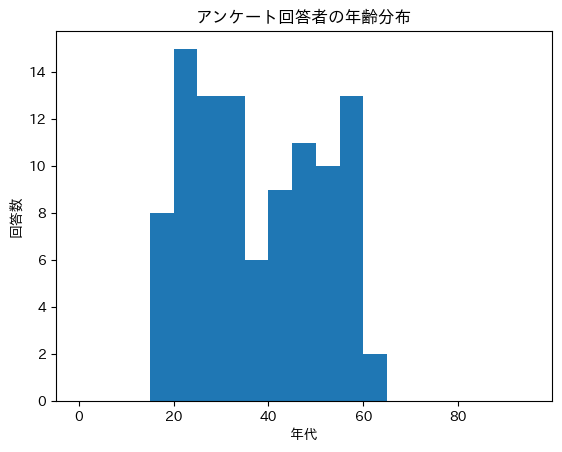

In [15]:
bins = range(0, 100, 5)
data.plot.hist(
    bins=bins,
    title="アンケート回答者の年齢分布",
    xlabel="年代",
    ylabel="回答数",
    legend=None,
)

それぞれの階級の度数を確認したい場合は、``pandas.cut``と``pandas.value_counts``を組み合わせて使います。

In [61]:
bins = range(0, 100, 10)
# listを渡すと、Categorical型で返ってくる
# c = pd.cut(ages, bins=bins)

# pd.Seriesを渡すと、pd.Seriesで返ってくる
# c = pd.cut(data["age"], bins=bins)
c = (
    data["age"]
    .value_counts(bins=bins)
    .reset_index()
    .rename(columns={"index": "rank", "count": "freq"})
)
c

,rank,freq
0,"(20.0, 30.0]",27
1,"(50.0, 60.0]",23
2,"(30.0, 40.0]",20
3,"(40.0, 50.0]",19
4,"(10.0, 20.0]",11
5,"(-0.001, 10.0]",0
6,"(60.0, 70.0]",0
7,"(70.0, 80.0]",0
8,"(80.0, 90.0]",0


In [63]:
np.histogram(data["age"])

(array([14, 14, 10, 11,  4, 10,  5, 10,  9, 13]),
 array([18. , 22.2, 26.4, 30.6, 34.8, 39. , 43.2, 47.4, 51.6, 55.8, 60. ]))